# Practical Data Science 2023: Exercise 1
Vasileios Dimopoulos, October 2023

In [1]:
from PIL import Image
from IPython.display import display

## Exercise 5

In [2]:
img1 = Image.open('images/5_1.png')
img2 = Image.open('images/5_2.png')
img3 = Image.open('images/5_3.png')
img4 = Image.open('images/5_4.png')
img5 = Image.open('images/11_1.png')
img6 = Image.open('images/11_2.png')
img7 = Image.open('images/11_3.png')

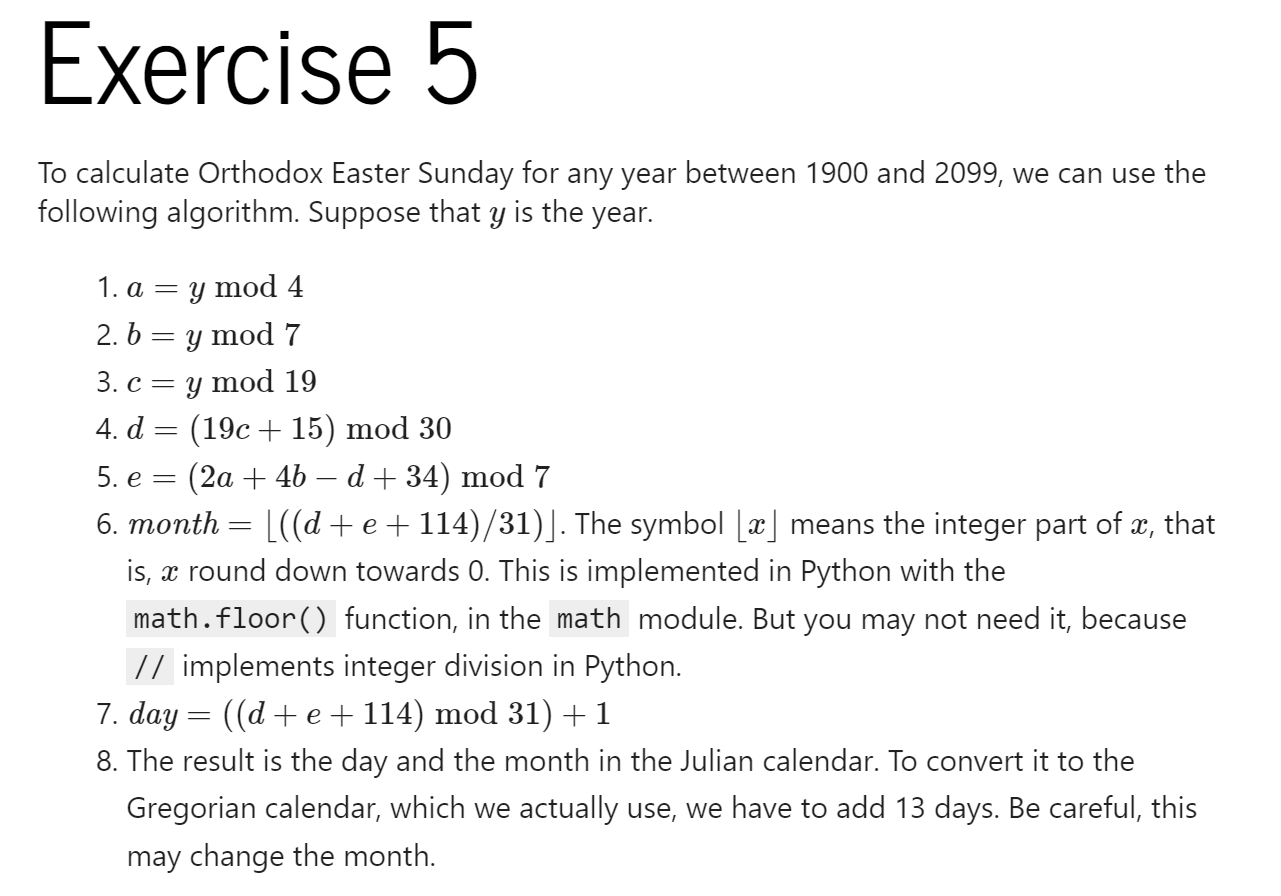

In [3]:
display(img1)

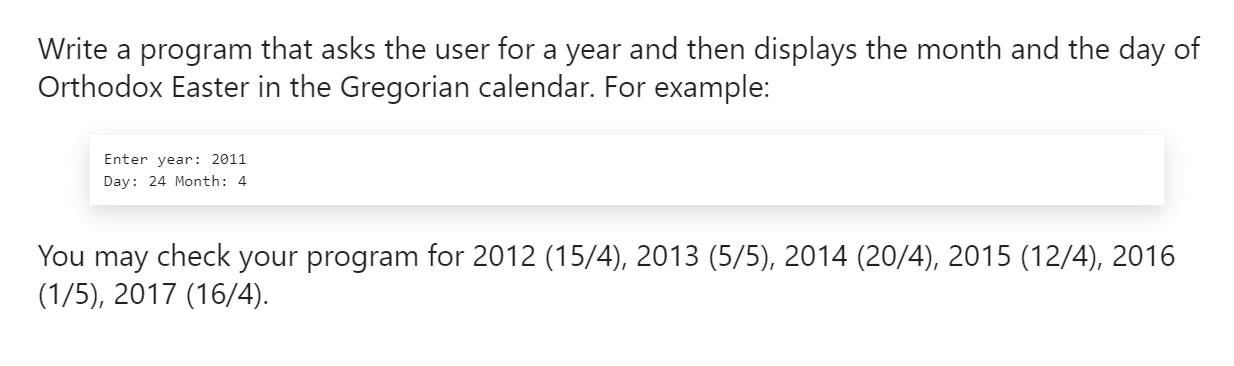

In [4]:
display(img2)

### ChatGPT Promt

"I want you to write a python programm that does the below: 
calculates the Orthodox Easter Sunday for any year between 1900 and 2099, using following algorithm (y is the year):

a= y mod 4 

b = y mod 7

c = y mod 19

d = (19c + 15) mod 30

e =(2a+4b−d+34)mod7

month=⌊((d+e+114)/31)⌋

The symbol ⌊x⌋ means the integer part of x, that is, x
 round down towards 0. use // for the calculation of month.

day=((d+e+114)mod31)+1

The result is the day and the month in the Julian calendar. To convert it to the Gregorian calendar,  add 13 days to the final result.

when called on the command line print:

Enter Year: and wait for the users input for y

After executing the algorithm return:

Day: number_of_day Month: Number_of_month"

### ChatGPT Return

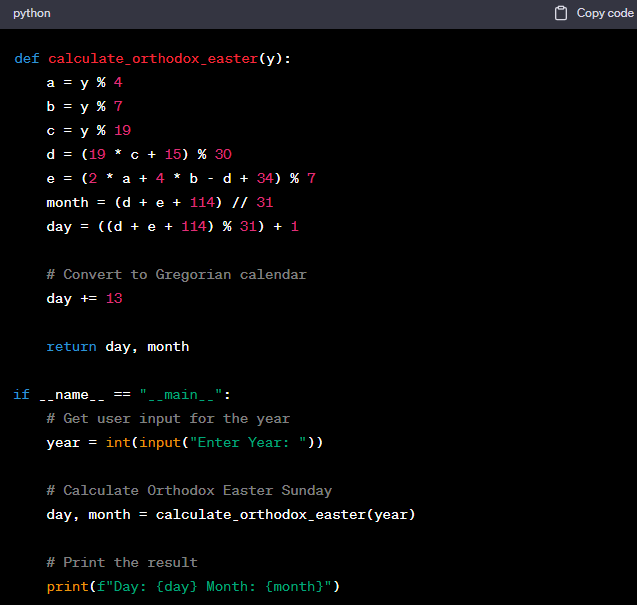

In [5]:
display(img3)

In [6]:
def calculate_orthodox_easter(y):
    a = y % 4
    b = y % 7
    c = y % 19
    d = (19 * c + 15) % 30
    e = (2 * a + 4 * b - d + 34) % 7
    month = (d + e + 114) // 31
    day = ((d + e + 114) % 31) + 1

    # Convert to Gregorian calendar
    day += 13

    return day, month

Give 2013 as input to find the bug on the code.

In [7]:
year = int(input("Enter Year: "))

# Calculate Orthodox Easter Sunday
day, month = calculate_orthodox_easter(year)

# Print the result
print(f"Day: {day} Month: {month}")

Enter Year: 2013
Day: 35 Month: 4


As we can see, when we intentionally skip the last sentence of the prompt ("Be careful, this may change the month."), the AI does not identify that by adding 13 days to the result, the days variable can go over 30 (or 31). Even though we explicitly stated the use case of the programm on the promt and what the final conversion (+13 days) means (convert to gregorian calendar, which we expect ChatGPT to know of), the LLM failed to recognize that it needs to add a month and remove 30 days when the days value overflows. On our example, when we input 2013 as the year, it returns 35/4 instead of 5/5. That happened because I told the AI to follow a specific given algorithm for the production of the code, so it converted each line to code without caring for the context, only for the commands.

### Correction

"Be careful, this may change the month if days go over for a certain month. Also, march has 31 days, april 30 and may 31. I want it to work for every month 3,4 or 5"

(We suppode that orthodox Easter will be in Spring)

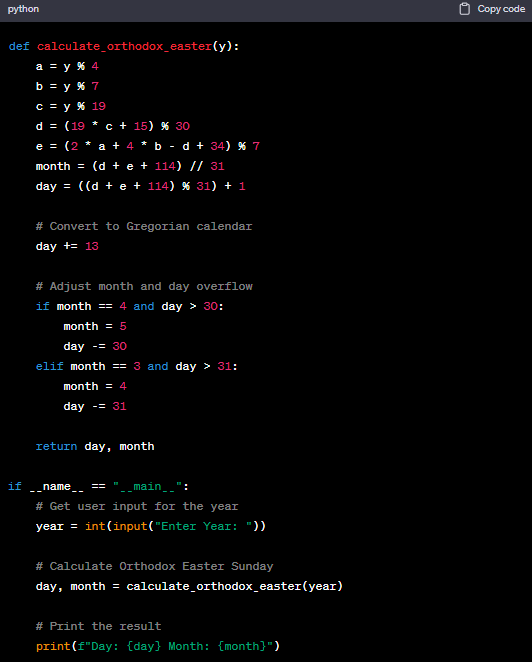

In [8]:
display(img4)

In [9]:
def calculate_orthodox_easter(y):
    a = y % 4
    b = y % 7
    c = y % 19
    d = (19 * c + 15) % 30
    e = (2 * a + 4 * b - d + 34) % 7
    month = (d + e + 114) // 31
    day = ((d + e + 114) % 31) + 1

    # Convert to Gregorian calendar
    day += 13

    # Adjust month and day overflow
    if month == 4 and day > 30:
        month = 5
        day -= 30
    elif month == 3 and day > 31:
        month = 4
        day -= 31

    return day, month

Test for 2013 and 2015

In [10]:
# Get user input for the year
year = int(input("Enter Year: "))

# Calculate Orthodox Easter Sunday
day, month = calculate_orthodox_easter(year)

# Print the result
print(f"Day: {day} Month: {month}")

Enter Year: 2015
Day: 12 Month: 4


Now the programm runs properly, caring for overflows on both 30 or 31 day months.

## Exercise 11

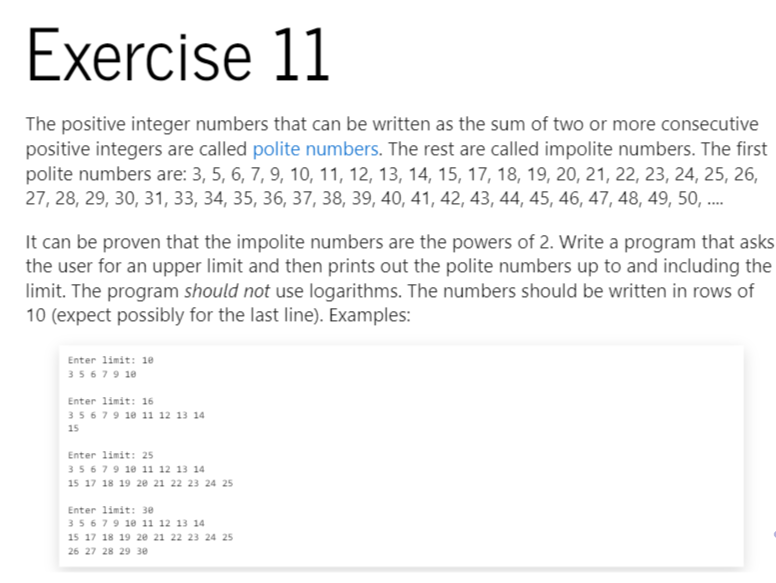

In [11]:
display(img5)

### ChatGPT Prompt

We gave the exact text from above as a promt:

The positive integer numbers that can be written as the sum of two or more consecutive positive integers are called polite numbers. The rest are called impolite numbers. The first polite numbers are: 3, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, ....

It can be proven that the impolite numbers are the powers of 2. Write a program that asks the user for an upper limit and then prints out the polite numbers up to and including the limit. The program should not use logarithms. The numbers should be written in rows of 10 (expect possibly for the last line). (python)

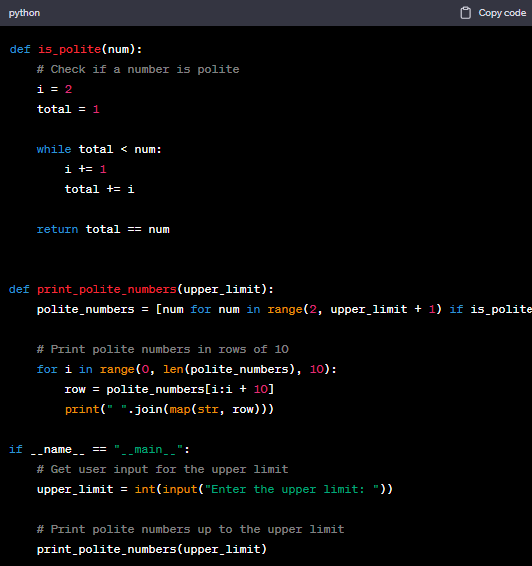

In [12]:
display(img6)

In [13]:
def is_polite(num):
    # Check if a number is polite
    i = 2
    total = 1

    while total < num:
        i += 1
        total += i

    return total == num


def print_polite_numbers(upper_limit):
    polite_numbers = [num for num in range(2, upper_limit + 1) if is_polite(num)]

    # Print polite numbers in rows of 10
    for i in range(0, len(polite_numbers), 10):
        row = polite_numbers[i:i + 10]
        print(" ".join(map(str, row)))


Give input 25 to find the mistake.

In [14]:
# Get user input for the upper limit
upper_limit = int(input("Enter the upper limit: "))

# Print polite numbers up to the upper limit
print_polite_numbers(upper_limit)

Enter the upper limit: 25
4 8 13 19


As we can see the result is completely wrong. The given code just added all the numbers leading to the upper limit to see if the last addition will produce a nmuber equal to the limit. This creates a program that keeps only the numbers that can be produced by 1 + 2 + 3 + ... and not by any consecutive numbers of the interval. Again, even though ChatGPT should know what a polite number is from its training, it fails to take it as context and only executes what it understands from the given text. Also, it doesn't even use the information given for the powers of 2. Our input was very generic and didn't give any real instructions as to how the program has to be created, leaving the AI to work on an abstract understanding of the case.

### Correction

"write a python program which takes as an input a number as an upper limit. Then with a loop it calculates the powers of 2 and inputs them in a list, until the power is bigger than the number, in which case the loop stops and the number is not inserted in the list. Finally print all the numbers from 1 to the limit, without the numbers of the list, arranged in rows of 10. The program will show "Enter limit: " to the user and wait for his input."

We explained exactly what we wanted, to print all the numbers leading to the limit, without the powers of 2, explaining to the AI how to do it.

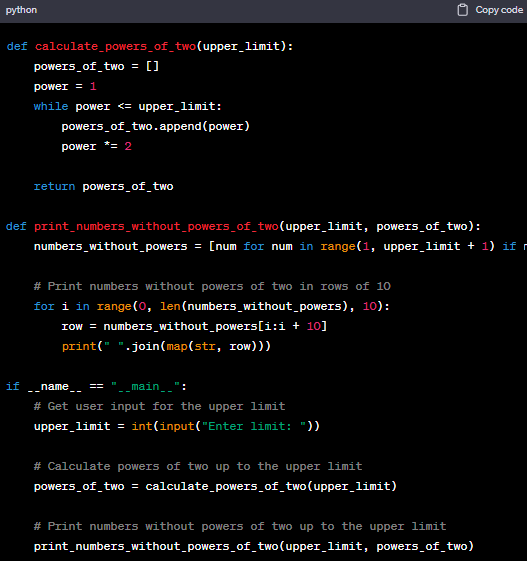

In [16]:
display(img7)

In [17]:
def calculate_powers_of_two(upper_limit):
    powers_of_two = []
    power = 1
    while power <= upper_limit:
        powers_of_two.append(power)
        power *= 2

    return powers_of_two

def print_numbers_without_powers_of_two(upper_limit, powers_of_two):
    numbers_without_powers = [num for num in range(1, upper_limit + 1) if num not in powers_of_two]

    # Print numbers without powers of two in rows of 10
    for i in range(0, len(numbers_without_powers), 10):
        row = numbers_without_powers[i:i + 10]
        print(" ".join(map(str, row)))

In [18]:
# Get user input for the upper limit
upper_limit = int(input("Enter limit: "))

# Calculate powers of two up to the upper limit
powers_of_two = calculate_powers_of_two(upper_limit)

# Print numbers without powers of two up to the upper limit
print_numbers_without_powers_of_two(upper_limit, powers_of_two)

Enter limit: 25
3 5 6 7 9 10 11 12 13 14
15 17 18 19 20 21 22 23 24 25


Now the result is correct for any number.